<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/main/Detailed%20Analysis%20of%20Classification%20Techniques/Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Analysis



##Dataset : cars.data

### **Dataset breakdown**
---
***Attributes:***

   **CAR:**                      car acceptability

   **PRICE**:                  overall price

   **buying:**               buying price

   **maint:**                price of the maintenance

   **TECH:**                   technical characteristics

   **COMFORT:**              comfort

   **doors:**              number of doors

   **persons:**            capacity in terms of persons to carry

   **lug_boot:**           the size of luggage boot

   **safety:**               estimated safety of the car
  
***Missing Attribute Values:*** none
----
***Class Distribution (number of instances per class)***
----

   **class:**      N          N[%]

   **unacc:**     1210     (70.023 %) 

   **acc:**        384     (22.222 %) 

   **good:**       69     ( 3.993 %) 

   **v-good:**      65     ( 3.762 %) 

***Number of Instances:*** 1728
---
***Number of Attributes:*** 6
---
***Attribute Values:***
---
   **buying:**       v-high, high, med, low

   **maint:**        v-high, high, med, low

   **doors:**        2, 3, 4, 5-more

   **persons:**      2, 4, more

   **lug_boot:**     small, med, big

   **safety:**       low, med, high



##Importing Libraries

In [397]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib

In [398]:
from google.colab import drive

In [399]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [400]:
cd /content/drive/"My Drive/datasets"

/content/drive/My Drive/datasets


In [401]:
dataset = pd.read_csv('car.data')

In [402]:
dataset

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


## Data Pre-processing 

In [403]:
dataset.head

<bound method NDFrame.head of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [404]:
dataset.shape

(1727, 7)

In [405]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [406]:
dataset.isnull().any()

vhigh      False
vhigh.1    False
2          False
2.1        False
small      False
low        False
unacc      False
dtype: bool

In [407]:
dataset.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity',
       'Size of Luggage Boot', 'safety', 'Decision']

### Turning data into numerical features (0-5)

In [408]:
dataset['Decision'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: Decision, dtype: int64

In [409]:
dataset.Decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)

In [410]:
dataset['Decision'].value_counts()

0    1209
1     384
2      69
3      65
Name: Decision, dtype: int64

In [411]:
dataset['Size of Luggage Boot'].value_counts().sort_index()

big      576
med      576
small    575
Name: Size of Luggage Boot, dtype: int64

In [412]:
dataset['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)

In [413]:
dataset['Size of Luggage Boot'].value_counts()

2    576
1    576
0    575
Name: Size of Luggage Boot, dtype: int64

In [414]:
dataset['safety'].value_counts().sort_index()

high    576
low     575
med     576
Name: safety, dtype: int64

In [415]:
dataset['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)

In [416]:
dataset['safety'].value_counts()

2    576
1    576
0    575
Name: safety, dtype: int64

In [417]:
dataset['Price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    431
Name: Price, dtype: int64

In [418]:
dataset['Price'].replace(('low','med','high','vhigh'),(0,1,2,3), inplace = True)

In [419]:
dataset['Price'].value_counts()

2    432
1    432
0    432
3    431
Name: Price, dtype: int64

In [420]:
dataset['Maintenance Cost'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    431
Name: Maintenance Cost, dtype: int64

In [421]:
dataset['Maintenance Cost'].replace(('low','med','high','vhigh'),(0,1,2,3), inplace = True)

In [422]:
dataset['Maintenance Cost'].value_counts()

2    432
1    432
0    432
3    431
Name: Maintenance Cost, dtype: int64

In [423]:
dataset['Number of Doors'].value_counts()

5more    432
4        432
3        432
2        431
Name: Number of Doors, dtype: int64

In [424]:
dataset['Number of Doors'].replace('5more',5, inplace = True)

In [425]:
dataset['Number of Doors'].value_counts()

4    432
3    432
5    432
2    431
Name: Number of Doors, dtype: int64

In [426]:
dataset['Capacity'].value_counts()

more    576
4       576
2       575
Name: Capacity, dtype: int64

In [427]:
dataset['Capacity'].replace('more',5, inplace = True)

In [428]:
dataset['Capacity'].value_counts()

4    576
5    576
2    575
Name: Capacity, dtype: int64

In [429]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 1727 non-null   int64 
 1   Maintenance Cost      1727 non-null   int64 
 2   Number of Doors       1727 non-null   object
 3   Capacity              1727 non-null   object
 4   Size of Luggage Boot  1727 non-null   int64 
 5   safety                1727 non-null   int64 
 6   Decision              1727 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [430]:
dataset['Number of Doors'] = dataset['Number of Doors'].astype(int)
dataset['Capacity'] = dataset['Capacity'].astype(int)

In [431]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Price                 1727 non-null   int64
 1   Maintenance Cost      1727 non-null   int64
 2   Number of Doors       1727 non-null   int64
 3   Capacity              1727 non-null   int64
 4   Size of Luggage Boot  1727 non-null   int64
 5   safety                1727 non-null   int64
 6   Decision              1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [432]:
# splitting the dataset into dependent and independent variables
X = dataset.iloc[:,:6].values
y = dataset.iloc[:, 6].values

In [433]:
X

array([[3, 3, 2, 2, 0, 1],
       [3, 3, 2, 2, 0, 2],
       [3, 3, 2, 2, 1, 0],
       ...,
       [0, 0, 5, 5, 2, 0],
       [0, 0, 5, 5, 2, 1],
       [0, 0, 5, 5, 2, 2]])

In [434]:
y

array([0, 0, 0, ..., 0, 2, 3])

###Performing Algorithms 

In [435]:
#dataset.Decision.replace((0,1,2,3),(0,0,1,1), inplace = True)
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1467, 6)
Shape of y_train:  (1467,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


In [436]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [437]:
#Random Forest 
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier()
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  1.0
Testing Accuracy:  0.9769230769230769
Precision: 0.8828983516483517
Recall: 0.8705357142857143
[[184   0   0   0]
 [  0  55   1   0]
 [  0   0   6   4]
 [  0   1   0   9]]


In [438]:
#Decision Tree
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
max_d = 22
dec_tree_training_accuracies = []
dec_tree_testing_accuracies = [] 
for i in range(2,max_d):

  # creating a model
  model = DecisionTreeClassifier(max_depth = i-1)
  # feeding the training data into the model
  model.fit(x_train, y_train)

  # predicting the values for x-test
  y_pred = model.predict(x_test)

  # finding the training and testing accuracy
  print("For Max Depth = ",i," Decision Tree ->")
  print("Training Accuracy: ",model.score(x_train, y_train))
  print("Testing Accuracy: ",model.score(x_test, y_test))
  print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
  print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
  print('\n\n')
  dec_tree_training_accuracies.append(model.score(x_train, y_train))
  dec_tree_testing_accuracies.append(model.score(x_test, y_test))
  # printing the confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

For Max Depth =  2  Decision Tree ->
Training Accuracy:  0.6987048398091343
Testing Accuracy:  0.7076923076923077
Precision: 0.17692307692307693
Recall: 0.25



[[184   0   0   0]
 [ 56   0   0   0]
 [ 10   0   0   0]
 [ 10   0   0   0]]
For Max Depth =  3  Decision Tree ->
Training Accuracy:  0.7743694614860259
Testing Accuracy:  0.7961538461538461
Precision: 0.37844036697247707
Recall: 0.45516304347826086



[[151  33   0   0]
 [  0  56   0   0]
 [  0  10   0   0]
 [  0  10   0   0]]
For Max Depth =  4  Decision Tree ->
Training Accuracy:  0.7832310838445807
Testing Accuracy:  0.8384615384615385
Precision: 0.3804199385455787
Recall: 0.4079968944099379



[[182   2   0   0]
 [ 20  36   0   0]
 [  0  10   0   0]
 [  0  10   0   0]]
For Max Depth =  5  Decision Tree ->
Training Accuracy:  0.8486707566462167
Testing Accuracy:  0.8615384615384616
Precision: 0.5264049808886766
Recall: 0.6587732919254659



[[176   8   0   0]
 [  6  38  12   0]
 [  0   0  10   0]
 [  0   0  10   0]]
For Max

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

For Max Depth =  18  Decision Tree ->
Training Accuracy:  1.0
Testing Accuracy:  0.9769230769230769
Precision: 0.9301620586103345
Recall: 0.8705357142857144



[[184   0   0   0]
 [  1  55   0   0]
 [  0   0   8   2]
 [  0   3   0   7]]
For Max Depth =  19  Decision Tree ->
Training Accuracy:  1.0
Testing Accuracy:  0.9923076923076923
Precision: 0.994184362934363
Recall: 0.9705357142857143



[[184   0   0   0]
 [  1  55   0   0]
 [  0   1   9   0]
 [  0   0   0  10]]
For Max Depth =  20  Decision Tree ->
Training Accuracy:  1.0
Testing Accuracy:  0.9769230769230769
Precision: 0.9301620586103345
Recall: 0.8705357142857144



[[184   0   0   0]
 [  1  55   0   0]
 [  0   0   8   2]
 [  0   3   0   7]]
For Max Depth =  21  Decision Tree ->
Training Accuracy:  1.0
Testing Accuracy:  0.9923076923076923
Precision: 0.994184362934363
Recall: 0.9705357142857143



[[184   0   0   0]
 [  1  55   0   0]
 [  0   1   9   0]
 [  0   0   0  10]]


In [439]:

dec_tree_training_accuracies,dec_tree_testing_accuracies

([0.6987048398091343,
  0.7743694614860259,
  0.7832310838445807,
  0.8486707566462167,
  0.8704839809134287,
  0.934560327198364,
  0.9372869802317655,
  0.978186775732788,
  0.9829584185412407,
  0.9959100204498977,
  0.9979550102249489,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.7076923076923077,
  0.7961538461538461,
  0.8384615384615385,
  0.8615384615384616,
  0.9076923076923077,
  0.9346153846153846,
  0.9346153846153846,
  0.9769230769230769,
  0.9692307692307692,
  0.9807692307692307,
  0.9923076923076923,
  0.9923076923076923,
  0.9769230769230769,
  0.9769230769230769,
  0.9769230769230769,
  0.9923076923076923,
  0.9769230769230769,
  0.9923076923076923,
  0.9769230769230769,
  0.9923076923076923])

In [440]:
dec_max_value = max(dec_tree_testing_accuracies)
dec_max_index = dec_tree_testing_accuracies.index(dec_max_value)

In [441]:
print("BEST VALUE OF MAX_DEPTH FOR DECISION MATRIX : ",max_index," : With an accuracy of : ",dec_max_value)

BEST VALUE OF MAX_DEPTH FOR DECISION MATRIX :  2  : With an accuracy of :  0.9923076923076923


No handles with labels found to put in legend.


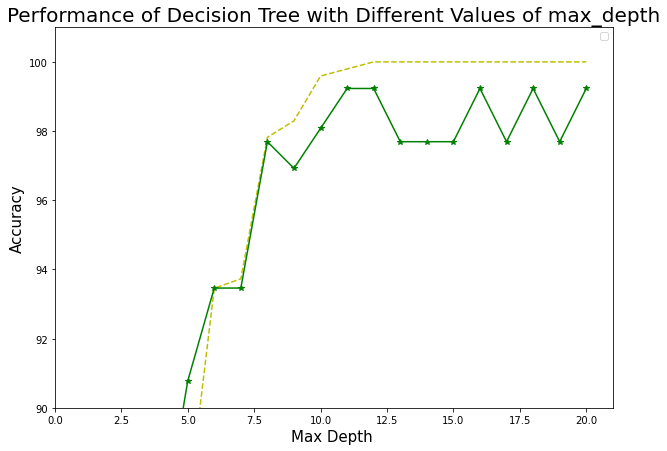

In [442]:
max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Training_Accuracy = np.array(dec_tree_training_accuracies)
Testing_Accuracy = np.array(dec_tree_testing_accuracies)
Training_Accuracy = Training_Accuracy*100
Testing_Accuracy = Testing_Accuracy*100
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'y--')
plt.plot(max_depth, Testing_Accuracy, 'g-*')
plt.title('Performance of Decision Tree with Different Values of max_depth', fontsize = 20)
plt.xlim([0, 21])
plt.ylim([90, 101])
plt.xlabel('Max Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

In [443]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [444]:
training_accuracies = []
testing_accuracies = []
for i in range(1,21):
  # creating a model
  model = KNeighborsClassifier(n_neighbors = i)

  # feeding the training data into the model
  model.fit(x_train, y_train)

  # predicting the values for x-test
  y_pred = model.predict(x_test)

  # finding the training and testing accuracy
  print("For K = ",i," ->")
  print("Training Accuracy: ",model.score(x_train, y_train))
  print("Testing Accuracy: ",model.score(x_test, y_test))
  print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
  print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
  print('\n\n')
  # printing the confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  training_accuracies.append(model.score(x_train, y_train))
  testing_accuracies.append(model.score(x_test, y_test))

For K =  1  ->
Training Accuracy:  1.0
Testing Accuracy:  0.9615384615384616
Precision: 0.8648119122257054
Recall: 0.9061723602484472



[[180   4   0   0]
 [  0  53   3   0]
 [  0   0   8   2]
 [  0   1   0   9]]
For K =  2  ->
Training Accuracy:  0.9761417859577369
Testing Accuracy:  0.9153846153846154
Precision: 0.9473913043478261
Recall: 0.7785714285714287



[[184   0   0   0]
 [ 16  40   0   0]
 [  0   3   7   0]
 [  0   3   0   7]]
For K =  3  ->
Training Accuracy:  0.9931833674164963
Testing Accuracy:  0.9692307692307692
Precision: 0.951096168017686
Recall: 0.8883540372670807



[[182   2   0   0]
 [  2  54   0   0]
 [  0   2   7   1]
 [  0   1   0   9]]
For K =  4  ->
Training Accuracy:  0.9822767552828903
Testing Accuracy:  0.9576923076923077
Precision: 0.925169245647969
Recall: 0.8513198757763976



[[183   1   0   0]
 [  5  51   0   0]
 [  0   1   7   2]
 [  0   2   0   8]]
For K =  5  ->
Training Accuracy:  0.9904567143830948
Testing Accuracy:  0.9692307692307692
Precision

In [445]:
testing_accuracies,training_accuracies

([0.9615384615384616,
  0.9153846153846154,
  0.9692307692307692,
  0.9576923076923077,
  0.9692307692307692,
  0.9576923076923077,
  0.9653846153846154,
  0.9615384615384616,
  0.9653846153846154,
  0.9576923076923077,
  0.9653846153846154,
  0.9576923076923077,
  0.9653846153846154,
  0.9576923076923077,
  0.9692307692307692,
  0.9692307692307692,
  0.9653846153846154,
  0.9653846153846154,
  0.9615384615384616,
  0.9576923076923077],
 [1.0,
  0.9761417859577369,
  0.9931833674164963,
  0.9822767552828903,
  0.9904567143830948,
  0.9815950920245399,
  0.9856850715746421,
  0.9775051124744376,
  0.9829584185412407,
  0.9788684389911384,
  0.978186775732788,
  0.9740967961826857,
  0.9754601226993865,
  0.972733469665985,
  0.9788684389911384,
  0.9700068166325835,
  0.9706884798909339,
  0.9638718473074301,
  0.9659168370824812,
  0.961826857532379])

In [446]:
max_value = max(testing_accuracies)
max_index = testing_accuracies.index(max_value)

In [447]:
print("BEST VALUE OF K FOR KNN : ",max_index," : With an accuracy of : ",max_value)

BEST VALUE OF K FOR KNN :  2  : With an accuracy of :  0.9692307692307692


No handles with labels found to put in legend.


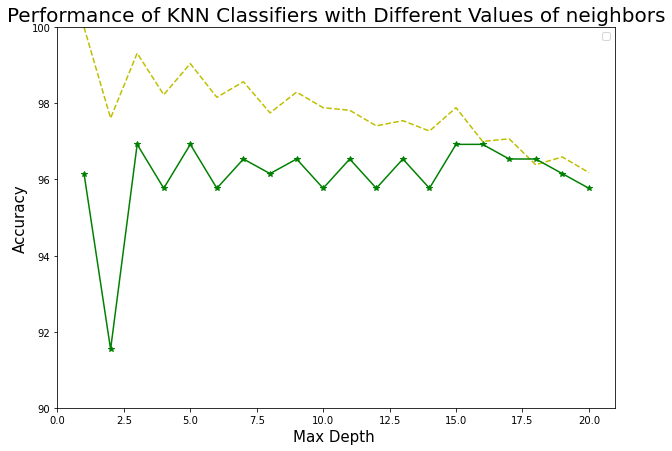

In [448]:
max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Training_Accuracy = np.array(training_accuracies)
Testing_Accuracy = np.array(testing_accuracies)
Training_Accuracy = Training_Accuracy*100
Testing_Accuracy = Testing_Accuracy*100
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'y--')
plt.plot(max_depth, Testing_Accuracy, 'g-*')
plt.title('Performance of KNN Classifiers with Different Values of neighbors', fontsize = 20)
plt.xlim([0, 21])
plt.ylim([90, 100])
plt.xlabel('Max Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()




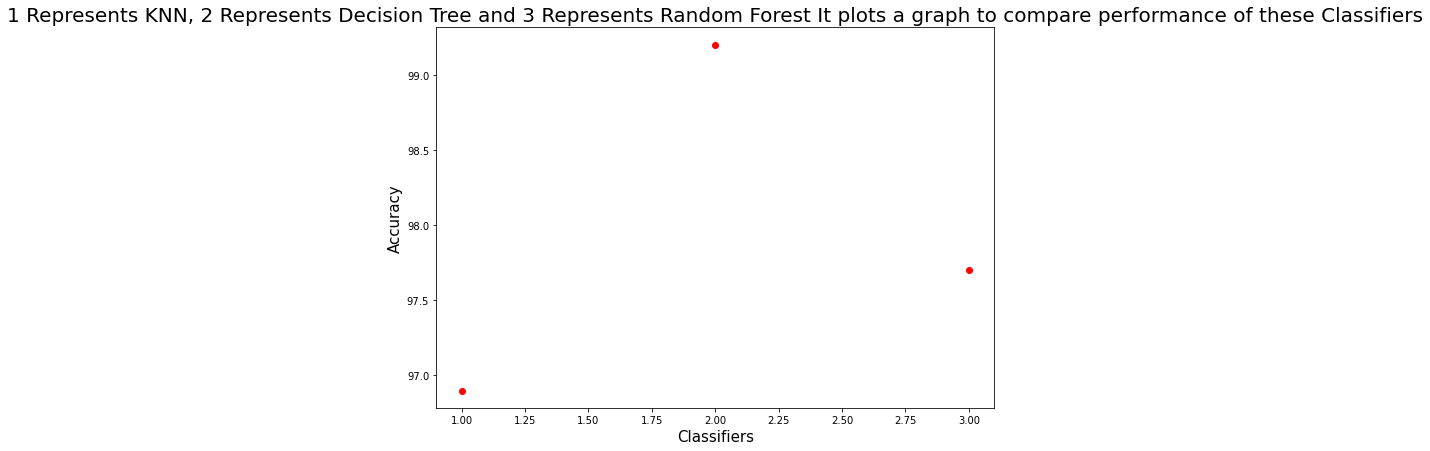

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns

Acc = np.array([96.9, 99.2, 97.7])
count = np.array([1, 2, 3])
plt.scatter(count, Acc, color = 'red')
plt.title('1 Represents KNN, 2 Represents Decision Tree and 3 Represents Random Forest \
It plots a graph to compare performance of these Classifiers', fontsize = 20)
plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

plt.show()

In [450]:
dataset.columns

Index(['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity',
       'Size of Luggage Boot', 'safety', 'Decision'],
      dtype='object')

In [451]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

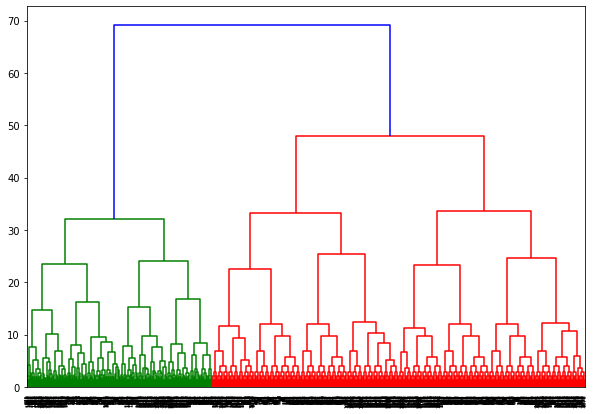

In [452]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [453]:
hc =  AgglomerativeClustering(n_clusters=6,linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([5, 5, 5, ..., 3, 3, 3])

In [454]:
for i in range(len(y_hc)):
  print(y_hc[i]," ", end="")
  if(i%50==0):
    print()
  

5  
5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  
4  4  5  5  5  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  5  5  5  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2  2  2  2  
2  2  2  2  2  2  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  
4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  5  5  5  5  5  5  5  5  5  2  2  2  2  
2  2  2  2  2  2  2  2  2  2  2  2  2  2  5  5  5  5  5  1  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  1  1  1  1  1  1  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  5  5  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  1  1  1  1  
1  1  1  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  

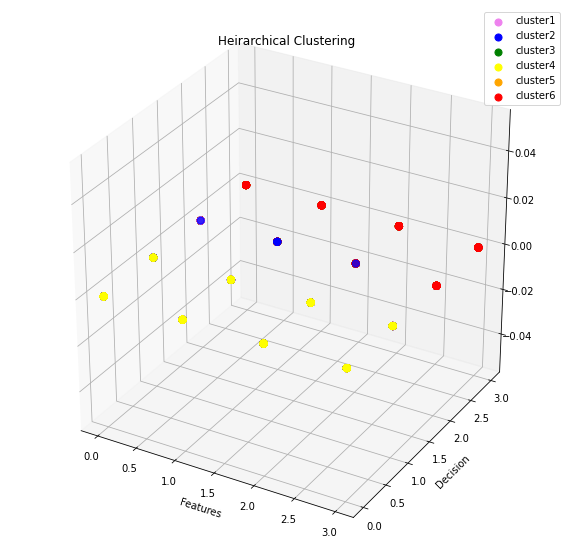

In [455]:
fig = plt.figure(figsize=(10,10))
plt.axes(projection = '3d')
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='violet',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='orange',label='cluster5')
plt.scatter(X[y_hc==5,0],X[y_hc==5,1],s=50,c='red',label='cluster6' )
plt.title('Heirarchical Clustering')
plt.xlabel('Features')
plt.ylabel('Decision')
plt.legend()

In [456]:
X.shape

(1727, 6)

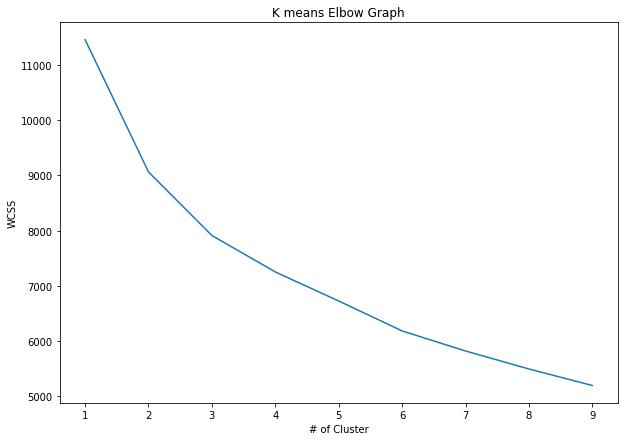

In [457]:
#K means elbow plot
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#residual values 
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

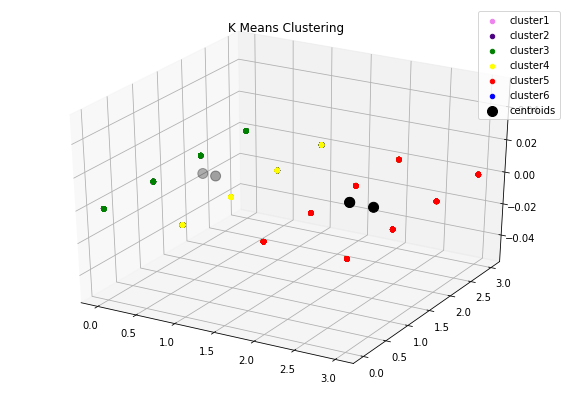

In [458]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=3)
y_kmeans = kmeans.fit_predict(X)
plt.axes(projection='3d')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='violet',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='indigo',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='yellow',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='red',label='cluster5')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=20,c='blue',label='cluster6' )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')

plt.title('K Means Clustering')

plt.legend()  
plt.show()

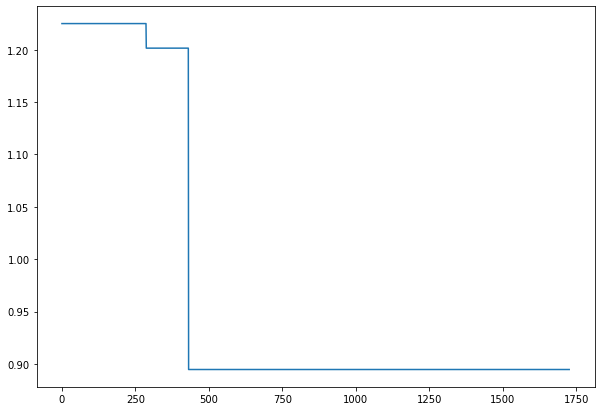

In [459]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
Y = StandardScaler().fit_transform(X)
ns = 6
nearestNeighbour = NearestNeighbors(ns).fit(Y)
distances,indices = nearestNeighbour.kneighbors(Y)
distanceDec = sorted(distances[:,5],reverse=True)
plt.plot(indices[:,0],distanceDec)
db = DBSCAN(eps=0.5,min_samples=5).fit(Y)
labels = db.labels_  #-1 is noise points
db.core_sample_indices_     #core_datapointa
cores_samples_mask = np.zeros_like(db.labels_,dtype=bool)
cores_samples_mask[db.core_sample_indices_]=True
cores_samples_mask
n_clusters = len(set(labels))-1
unique_lables = set(labels)
colors= [plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_lables))]

### **Conclusion**
As we can see, all the other algorithms performed well, but the K means and Hierarchical clustering showed unsatisfactory results, this is due to all the features being categorical.

KNN and Random Forest algorithms gave good result with almost nearby values for accuracy as again, the data is categorical and has a only 2,3 or 5 unique values per feature column

To make a better model, we can try using the unsupervised methods on the model before, to find the outliers, and then perform supervised learning algorithms.
